# Lesson 9

## Functions and 'Apply'

### 1) The tips.csv dataset contains data on tips collected from a restaurant.

#### a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.



In [8]:
from datascience import *
%matplotlib inline
Tips = Table.read_table("tips.csv")
Tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
import numpy as np
maletips = Tips.where("sex", are.equal_to("Male"))
maletipavg = np.average(maletips.column("tip"))
femaletips = Tips.where("sex", are.equal_to("Female"))
femaletipavg = np.average(femaletips.column("tip"))
print("The male tip average is " + str(maletipavg))
print("The female tip average is " + str(femaletipavg))

The male tip average is 3.0896178343949043
The female tip average is 2.8334482758620685


C:\Users\C20Austin.Logan\Downloads\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


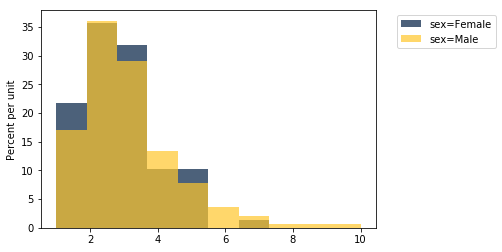

In [3]:
Tips.select("tip","sex").hist("tip",group="sex")

#### b. Repeat part a, but broken down by time.

C:\Users\C20Austin.Logan\Downloads\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


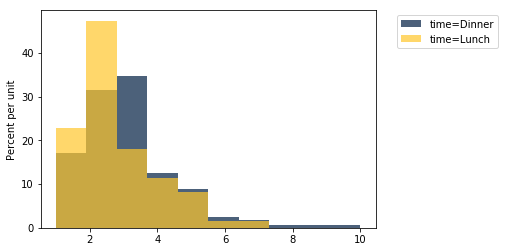

In [4]:
Tips.select("tip","time").hist("tip",group="time")

### 2) Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7).

In [26]:
def weekday_to_num(day):
    """This function returns a number denoting day of the week"""
    if day == "Mon":
        return 1
    if day == "Tues":
        return 2
    if day == "Wed":
        return 3
    if day == "Thur":
        return 4
    if day == "Fri":
        return 5
    if day == "Sat":
        return 6
    if day == "Sun":
        return 7

### 3) Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num.

In [27]:
Tips.append_column("weekday_num", Tips.apply(weekday_to_num, "day"))
Tips.sort("total_bill")

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


### 4) Create a function called est_tip. The output of this function will be the predicted tip amount.

In [33]:
def est_tip(bill_amt, window):
    """This function takes in a bill amount and a window value and predicts the tip based on the values inside this window"""
    new_tips = Tips.where("total_bill", are.between(bill_amt-window,bill_amt+window))
    return np.average(new_tips.column("tip"))

### 5) Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount.

In [55]:
win = 2
final_tips = Tips.append_column("predicted_tip", Tips.apply(est_tip, "total_bill", 1))
Tips

total_bill,tip,sex,smoker,day,time,size,weekday_num,predicted_tip
16.99,1.01,Female,No,Sun,Dinner,2,7,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,7,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,7,3.19508
23.68,3.31,Male,No,Sun,Dinner,2,7,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,7,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,7,3.67526
8.77,2,Male,No,Sun,Dinner,2,7,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,7,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,7,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,7,2.46231


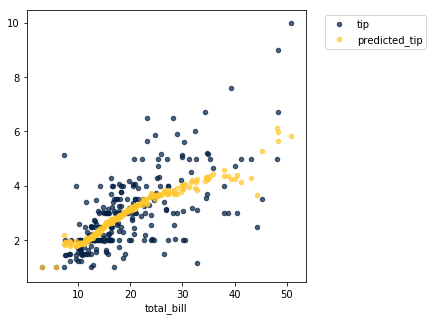

In [50]:
final_tips = Tips.select("total_bill", "tip", "predicted_tip")
final_tips.scatter('total_bill')